In [25]:
# import the libraries as shown below
import os,shutil,glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
dir_list = ['test','train','validation']
for d in dir_list:
    if os.path.exists(d):
        shutil.rmtree(d)


In [ ]:
!unzip "/content/drive/MyDrive/data/malaria/malaria_mkr.zip" -d "/content"

# Data preprocessing

The images are distributed in three directories.
1. train
2. test
3. validation

Each of them have subdirectories 'pos' and 'neg'

In [ ]:
directories = ['train','test','validation']
categories = ['pos','neg']
for d in directories:
    for c in categories:
        dc_path = os.path.join(d,c)
        print(f" Number of images in {d} and subdir {c} are {len(os.listdir(dc_path))}")
  # print("")

 Number of images in train and subdir pos are 3001
 Number of images in train and subdir neg are 3001
 Number of images in test and subdir pos are 500
 Number of images in test and subdir neg are 500
 Number of images in validation and subdir pos are 1000
 Number of images in validation and subdir neg are 1000


In [ ]:
train_dir = "train"
test_dir = "test"
validation_dir = 'validation'

lets check some images:

pos_1846.jpg


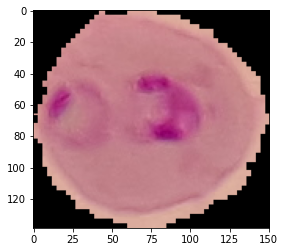



pos_1441.jpg


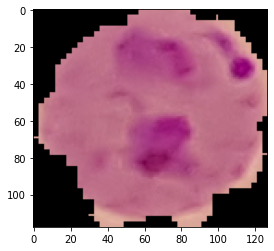



pos_2879.jpg


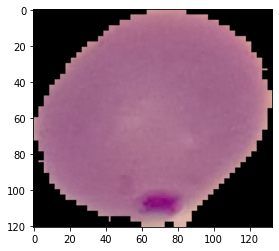

In [29]:
img_list = os.listdir('train/pos')[-3:]
for i in img_list:
    print(i)
    img = mpimg.imread("train/pos/"+i)
    plt.imshow(img)
    plt.show()
    print("\n")

neg_2917.jpg


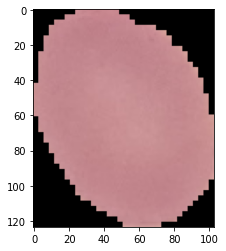



neg_806.jpg


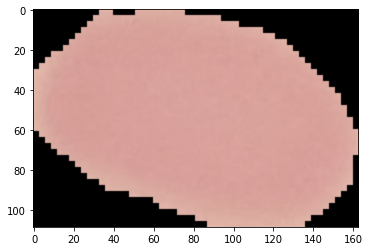



neg_1809.jpg


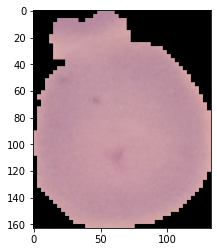

In [30]:
img_list = os.listdir('train/neg')[0:3]
for i in img_list:
    print(i)
    img = mpimg.imread("train/neg/"+i)
    plt.imshow(img)
    plt.show()
    print("\n")

# The tensorflow model

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=2,
                 padding = 'same',activation = 'relu',input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
             metrics=['accuracy'])

# import images

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)



In [ ]:
training_set = train_datagen.flow_from_directory(directory=train_dir,
                                                target_size=(128,128),
                                                batch_size=32,
                                                class_mode='binary')

Found 6000 images belonging to 2 classes.


In [ ]:
validation_set = train_datagen.flow_from_directory(directory=validation_dir,
                                                target_size=(128,128),
                                                batch_size=32,
                                                class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
fitting = model.fit_generator(training_set,
                             validation_data=(validation_set),
                              epochs=20,
                              steps_per_epoch = len(training_set),
                              validation_steps=len(validation_set)
                              
                            
                             )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


188/188 [==============================] - 38s 204ms/step - loss: 0.4765 - accuracy: 0.7870 - val_loss: 0.2996 - val_accuracy: 0.8770
Epoch 2/20
188/188 [==============================] - 37s 200ms/step - loss: 0.2571 - accuracy: 0.9052 - val_loss: 0.1989 - val_accuracy: 0.9205
Epoch 3/20
188/188 [==============================] - 38s 201ms/step - loss: 0.2214 - accuracy: 0.9230 - val_loss: 0.1911 - val_accuracy: 0.9295
Epoch 4/20
188/188 [==============================] - 38s 200ms/step - loss: 0.2052 - accuracy: 0.9270 - val_loss: 0.1933 - val_accuracy: 0.9300
Epoch 5/20
188/188 [==============================] - 38s 202ms/step - loss: 0.1908 - accuracy: 0.9313 - val_loss: 0.1838 - val_accuracy: 0.9370
Epoch 6/20
188/188 [==============================] - 38s 201ms/step - loss: 0.1787 - accuracy: 0.9365 - val_loss: 0.1841 - val_accuracy: 0.9415
Epoch 7/20
188/188 [==============================] - 38s 201ms/step - loss: 0.1749 - accuracy: 0.9397 - val_loss: 0.1971 - val_accuracy: 0.9

## save model for future

In [ ]:
model_name = "cnn_malaria_g.h5"
project_dir_path = "drive/MyDrive/data/malaria"
model_save_path = os.path.join(project_dir_path,model_name)
model.save(model_save_path)

In [ ]:
history_df = pd.DataFrame(fitting.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.476511,0.787000,0.299575,0.8770
1,0.257103,0.905167,0.198935,0.9205
2,0.221356,0.923000,0.191111,0.9295
3,0.205162,0.927000,0.193257,0.9300
4,0.190774,0.931333,0.183759,0.9370
5,0.178695,0.936500,0.184081,0.9415
6,0.174882,0.939667,0.197144,0.9345
7,0.172346,0.939333,0.165393,0.9400
8,0.168651,0.940333,0.172697,0.9455
9,0.165587,0.938833,0.158065,0.9420


In [ ]:
history_df.to_csv()

## training vs validation accuracy with epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


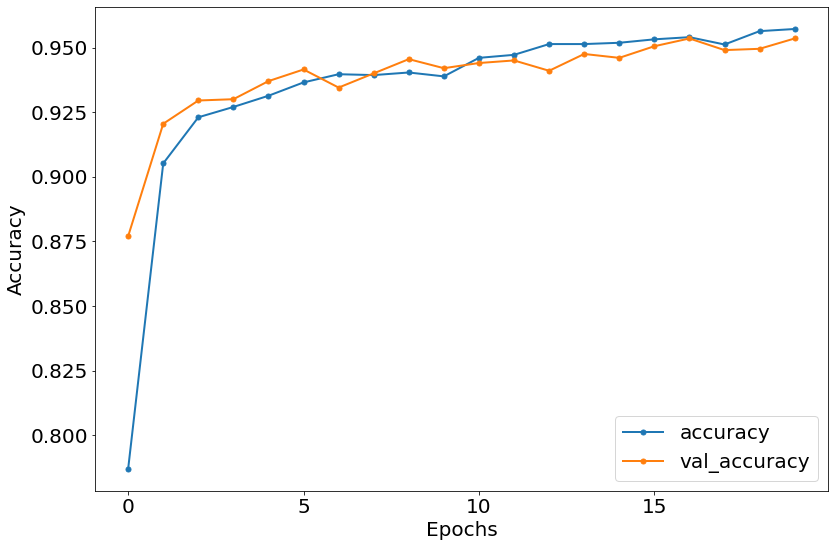

In [ ]:
plt.rc('font',size=20)
plt.figure(figsize=[12,8])
plt.plot(history_df['accuracy'],linewidth = 2,label="accuracy",
         marker = '.',markersize = 10)
plt.plot(history_df['val_accuracy'],linewidth = 2,label="val_accuracy",
         marker = '.',markersize = 10)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.axes().xaxis.get_major_locator().set_params(integer=True)
plt.tight_layout()
fig_name = os.path.join(project_dir_path,"cnn_accuracy.png")
plt.savefig(fig_name,facecolor='white', transparent=False,dpi=150)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


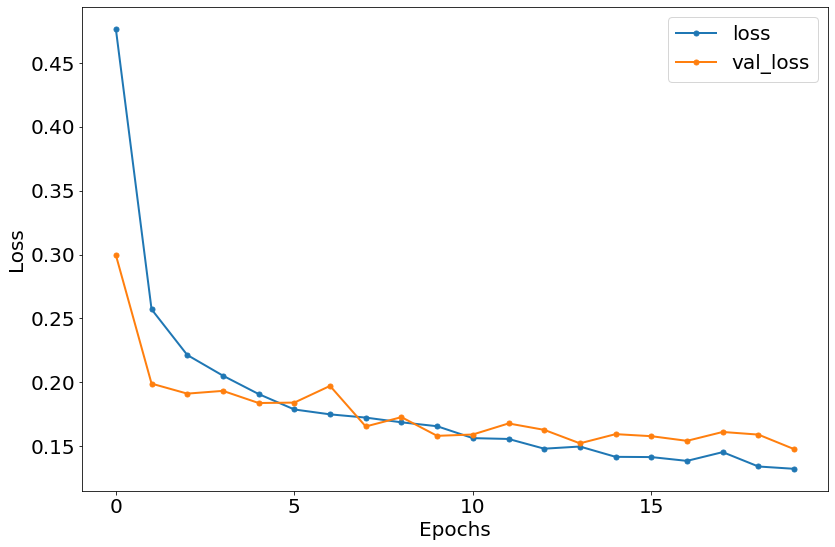

In [ ]:
plt.rc('font',size=20)
plt.figure(figsize=[12,8])
plt.plot(history_df['loss'],linewidth = 2,label="loss",
         marker = '.',markersize = 10)
plt.plot(history_df['val_loss'],linewidth = 2,label="val_loss",
         marker = '.',markersize = 10)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.axes().xaxis.get_major_locator().set_params(integer=True)
plt.tight_layout()
fig_name = os.path.join(project_dir_path,"cnn_loss.png")
# plt.savefig(fig_name,facecolor='white', transparent=False,dpi=150)

# load saved model

In [ ]:
model_name = "cnn_malaria_g.h5"
project_dir_path = "drive/MyDrive/data/malaria"
model_save_path = os.path.join(project_dir_path,model_name)


In [ ]:
model_new = load_model(model_save_path)

In [ ]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [ ]:
train_dir = "train"
test_dir = "test"
validation_dir = 'validation'

### make the testing dir

In [ ]:
# test_dir = "test"
# pos_test = 

all_test_dir = os.path.join('test','test_all','all_img')
# os.makedirs(all_test_dir) # all files will be stored in all_img

if not os.path.exists(all_test_dir):
    os.makedirs(all_test_dir)


all_pos = os.listdir("test/pos")
all_negs = os.listdir("test/neg")
for f in all_pos:
    shutil.copy(os.path.join("test","pos",f),os.path.join('test','test_all','all_img',f))
for f in all_negs:
    shutil.copy(os.path.join("test","neg",f),os.path.join('test','test_all','all_img',f))


ip_files = glob.glob('test/'+"**/.ipynb_checkpoints")
for ip in ip_files:
    print(ip)
    # if os.path.isfile(ip):
    shutil.rmtree(ip)

## test data generator

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data_set = test_datagen.flow_from_directory("test/test_all",
                                                 target_size=(128,128),
                                                batch_size=1,
                                                class_mode=None,
                                                 shuffle = False)

Found 1000 images belonging to 1 classes.


In [ ]:
test_data_set.class_indices

{'all_img': 0}

In [ ]:
step_size_test = test_data_set.n/test_data_set.batch_size
predictions = model_new.predict_generator(test_data_set,
                                      steps = step_size_test,
                                      verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


1000/1000 [==============================] - 9s 9ms/step


In [ ]:
predictions

In [ ]:
predictions.reshape(1,-1)

In [ ]:
training_set.class_indices

{'neg': 0, 'pos': 1}

In [ ]:
np.argmax(predictions,axis=1)

In [ ]:
file_names = test_data_set.filenames
results  = pd.DataFrame({'Filename':file_names,
                         'Predictions':predictions.reshape(1,-1)[0]})
results

,Filename,Predictions
0,all_img/neg_4001.jpg,0.067685
1,all_img/neg_4002.jpg,0.025765
2,all_img/neg_4003.jpg,0.066965
3,all_img/neg_4004.jpg,0.005709
4,all_img/neg_4005.jpg,0.007731
...,...,...
995,all_img/pos_4496.jpg,0.999994
996,all_img/pos_4497.jpg,0.999444
997,all_img/pos_4498.jpg,0.999906
998,all_img/pos_4499.jpg,0.999999


In [ ]:
results['Pred_class']=np.where(results['Predictions']>0.5,1,0)

In [ ]:
results

,Filename,Predictions,Pred_class
0,all_img/neg_4001.jpg,0.067685,0
1,all_img/neg_4002.jpg,0.025765,0
2,all_img/neg_4003.jpg,0.066965,0
3,all_img/neg_4004.jpg,0.005709,0
4,all_img/neg_4005.jpg,0.007731,0
...,...,...,...
995,all_img/pos_4496.jpg,0.999994,1
996,all_img/pos_4497.jpg,0.999444,1
997,all_img/pos_4498.jpg,0.999906,1
998,all_img/pos_4499.jpg,0.999999,1


In [ ]:
results['Filename'].str.contains('neg')

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Filename, Length: 1000, dtype: bool

In [ ]:
results['Filename'].str.contains('pos')

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: Filename, Length: 1000, dtype: bool

In [ ]:
results['input_type']=np.where(results['Filename'].str.contains('pos'),1,0)

In [ ]:
results

,Filename,Predictions,Pred_class,input_type
0,all_img/neg_4001.jpg,0.067685,0,0
1,all_img/neg_4002.jpg,0.025765,0,0
2,all_img/neg_4003.jpg,0.066965,0,0
3,all_img/neg_4004.jpg,0.005709,0,0
4,all_img/neg_4005.jpg,0.007731,0,0
...,...,...,...,...
995,all_img/pos_4496.jpg,0.999994,1,1
996,all_img/pos_4497.jpg,0.999444,1,1
997,all_img/pos_4498.jpg,0.999906,1,1
998,all_img/pos_4499.jpg,0.999999,1,1


In [ ]:
training_set.class_indices

{'neg': 0, 'pos': 1}

In [ ]:
class_i = training_set.class_indices
class_dict = dict([[i,c] for c,i in class_i.items()])
class_dict

{0: 'neg', 1: 'pos'}

In [ ]:
results['Pred_class'].map(class_dict)

0      neg
1      neg
2      neg
3      neg
4      neg
      ... 
995    pos
996    pos
997    pos
998    pos
999    pos
Name: Pred_class, Length: 1000, dtype: object

In [ ]:
results['Pred_class_output']=results['Pred_class'].map(class_dict)
results

,Filename,Predictions,Pred_class,input_type,Pred_class_output
0,all_img/neg_4001.jpg,0.067685,0,0,neg
1,all_img/neg_4002.jpg,0.025765,0,0,neg
2,all_img/neg_4003.jpg,0.066965,0,0,neg
3,all_img/neg_4004.jpg,0.005709,0,0,neg
4,all_img/neg_4005.jpg,0.007731,0,0,neg
...,...,...,...,...,...
995,all_img/pos_4496.jpg,0.999994,1,1,pos
996,all_img/pos_4497.jpg,0.999444,1,1,pos
997,all_img/pos_4498.jpg,0.999906,1,1,pos
998,all_img/pos_4499.jpg,0.999999,1,1,pos


In [ ]:
show_img = [0,1,2,-3,-2,-1]

file_name neg_4001.jpg


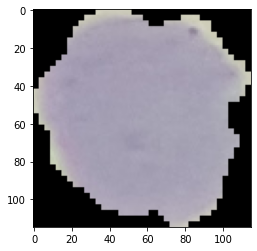

Predicted Probability 0.067685425
Predicted class neg
-------

file_name neg_4002.jpg


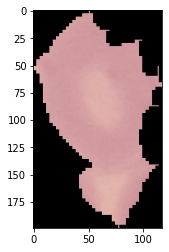

Predicted Probability 0.025765091
Predicted class neg
-------

file_name neg_4003.jpg


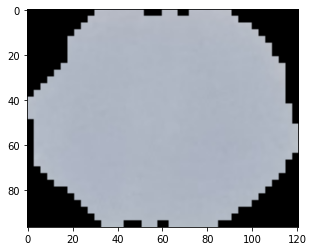

Predicted Probability 0.066964656
Predicted class neg
-------

file_name pos_4498.jpg


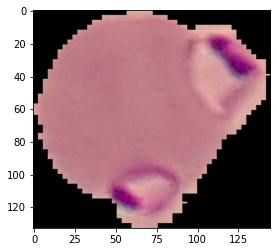

Predicted Probability 0.9999056
Predicted class pos
-------

file_name pos_4499.jpg


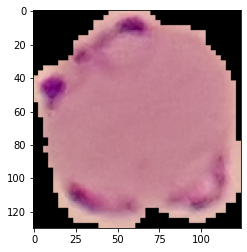

Predicted Probability 0.9999994
Predicted class pos
-------

file_name pos_4500.jpg


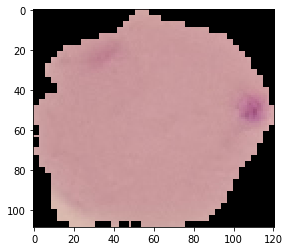

Predicted Probability 0.8576803
Predicted class pos
-------



In [ ]:
for i in show_img:

    # print(results.iloc[i])
    img_data = results.iloc[i]
    file_n = img_data.Filename
    pred   = img_data.Predictions
    
    print("file_name",os.path.basename(file_n))
    img = mpimg.imread(os.path.join("test/test_all",file_n))
    plt.imshow(img)
    plt.show()

    
    print("Predicted Probability",pred)
    print('Predicted class',class_dict[img_data.Pred_class])
    print("-------\n")

# Conclusion
- successfully created tensorflow model with accuracy over 0.95